In [ ]:
'''
1. What assets? What dates, etc.
In this assignment, I chose Japanese and US car and mobile companies.
TM = Toyota Mobile, SFTBY = Softbank Group, TSLA = Tesla Inc, VZ = Verizon Communications Inc.
The following content has been analyzed using data from January 1, 2018 to June 1, 2021.

2. Description of strategies
First, for Strategy 1, we set the SMA period as short = 50, Long = 200. 
Regarding Target_weights, since I have four brands, I divided 100 by 4 and applied 25% and -25%. 
As a result of various trials for the SMA period of Strategy 2, it was found that Short2 = 50 and Long2 = 110 are the optimum solutions.
※Below is a measurement sample.
50,100 = 98.2%, 50,150 = 41.05%, 30,200 = 29.28%, 50,250 = 17.86%, 50,110 = 100.98%, 50,120 = 93.88%

3. Select graphs from the output to include and explain it. What is the main message of the graphs?
 3-1.From the first graph, it can be seen that the stock prices of Tesla and Toyota have increased sharply since January 2021.
 3-2.From the second graph, we found the effectiveness of holding the shares of Tesla, Toyota and Verizon in the long term.
 3-3.From the last graph, the effectiveness of Strategy 2 has become remarkable since January 2021.
 
4. Make a table of some of the metrics for each strategy. Comment on the values and what they tell you.
Looking at the metric table, we can see that Strategy 1 has a return of 13.34% and Strategy 2 has a return of 100.98%. 
In other words, the improved strategy is effective because it produces about eight times as much results.

'''

In [1]:
import bt
import pandas as pd

C:\Users\Kazuhiko Fukunaga\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\Kazuhiko Fukunaga\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)
C:\Users\Kazuhiko Fukunaga\anaconda3\lib\site-packages\ffn\core.py:2299: RuntimeWarning: divide by zero encountered in true_divide
  res = np.divide(er.mean(), std)


Stat                 MA_cross2    MA_cross
-------------------  -----------  ----------
Start                2018-01-01   2018-01-01
End                  2021-06-01   2021-06-01
Risk-free rate       0.00%        0.00%

Total Return         100.98%      13.34%
Daily Sharpe         1.05         0.28
Daily Sortino        1.79         0.41
CAGR                 22.68%       3.73%
Max Drawdown         -30.44%      -36.96%
Calmar Ratio         0.75         0.10

MTD                  1.58%        0.24%
3m                   -0.57%       -8.20%
6m                   15.62%       7.03%
YTD                  4.44%        -3.32%
1Y                   80.99%       60.47%
3Y (ann.)            26.19%       4.26%
5Y (ann.)            -            -
10Y (ann.)           -            -
Since Incep. (ann.)  22.68%       3.73%

Daily Sharpe         1.05         0.28
Daily Sortino        1.79         0.41
Daily Mean (ann.)    22.82%       6.14%
Daily Vol (ann.)     21.64%       22.11%
Daily Skew           0.12

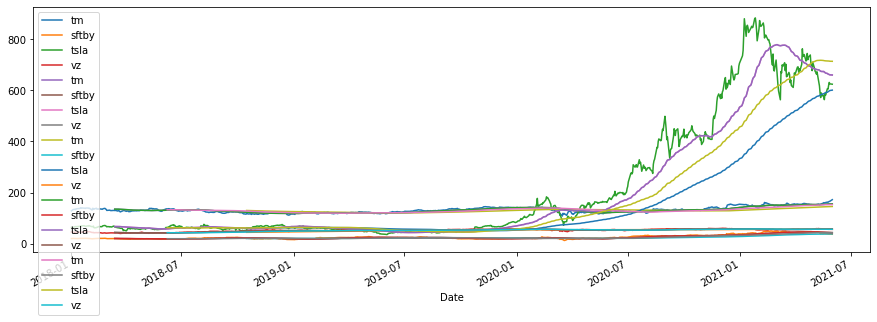

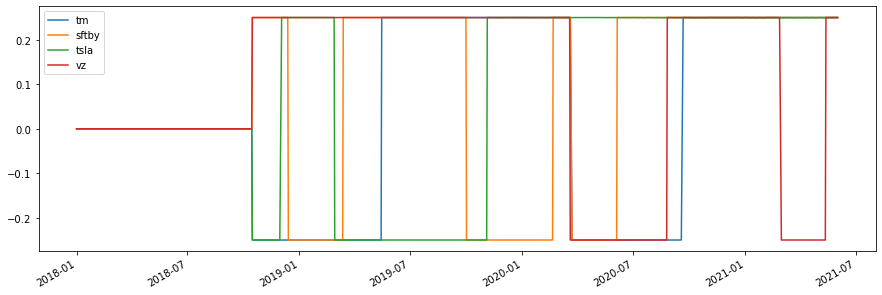

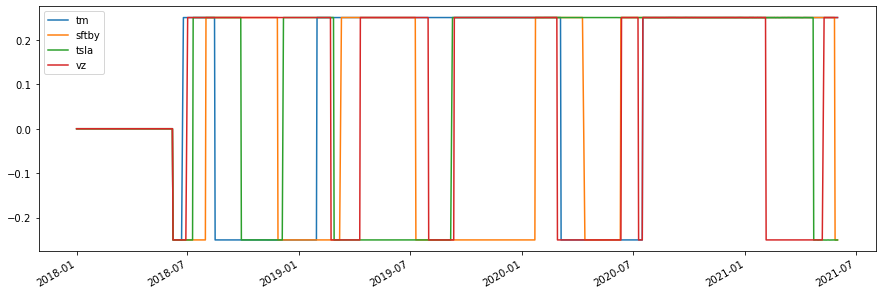

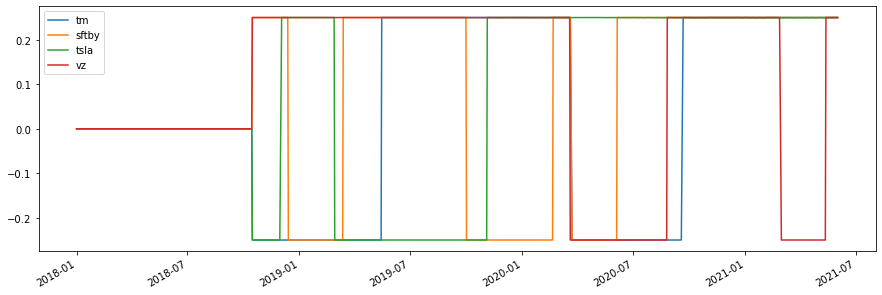

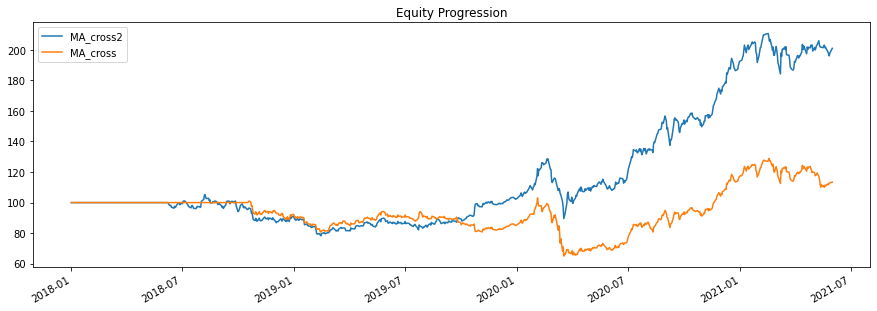

In [20]:
data = bt.get('TM,SFTBY,TSLA,VZ', start='2018-01-01', end= '2021-06-01')

short = 50
long = 200
short2= 50
long2= 110

sma_short = data.rolling(short).mean()
sma_long = data.rolling(long).mean()
sma_short2 = data.rolling(short2).mean()
sma_long2 = data.rolling(long2).mean()

sma_50 = data.rolling(50).mean()

plot = bt.merge(data, sma_short, sma_long, sma_short2, sma_long2).plot(figsize=(15, 5))

target_weights = sma_long.copy()

target_weights[sma_short > sma_long] =  0.25
target_weights[sma_short <= sma_long] = -0.25

target_weights2 = sma_long2.copy()

target_weights2[sma_short2 > sma_long2] =  0.25
target_weights2[sma_short2 <= sma_long2] = -0.25

MA_cross = bt.Strategy('MA_cross', [bt.algos.WeighTarget(target_weights),
                                    bt.algos.Rebalance()])

test_MA = bt.Backtest(MA_cross, data)
res_MA = bt.run(test_MA)

res_MA.plot_security_weights()

MA_cross2 = bt.Strategy('MA_cross2', [bt.algos.WeighTarget(target_weights2),
                                    bt.algos.Rebalance()])

test_MA2 = bt.Backtest(MA_cross2, data)
res_MA2 = bt.run(test_MA2)

res_MA2.plot_security_weights()
res_MA.plot_security_weights()

res = bt.run(test_MA2, test_MA)

res.plot()

res.display()


In [3]:
%matplotlib inline